In [0]:
from tensorflow.keras.datasets.mnist import load_data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Conv2DTranspose, Reshape, Dropout, Conv2D

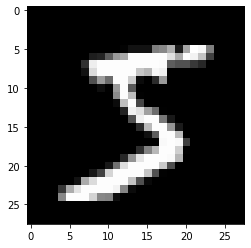

In [12]:
(X_train, _), (X_test, _) = load_data()
plt.imshow(X_train[0], cmap='gray', vmin=0, vmax=255)
plt.show()

In [13]:
epochs = 200
batch_size = 512
noise_dim = 100
buffer_size = 60000

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train. shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

train_dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size).batch(batch_size)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
#input-->image(noise), output-->image
def build_generator():
    model = Sequential()
    model.add(Dense(7*7*128, activation='relu', input_shape=(100, )))
    model.add(BatchNormalization())
    model.add(Reshape((7, 7, 128)))
    model.add(Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2DTranspose(1, (3, 3), strides=(2, 2), padding='same', activation='sigmoid'))
    assert model.output_shape == (None, 28, 28, 1)
    return model

#input-->image, output-->fake or real
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='valid', input_shape=(28, 28, 1), activation='relu'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [0]:
generator = build_generator()
discriminator = build_discriminator()

def generator_loss(fake_output):
    loss = binary_crossentropy(tf.ones_like(fake_output), fake_output)
    return loss

def discriminator_loss(real_output, fake_output):
    real_output_loss = binary_crossentropy(tf.ones_like(real_output), real_output)
    fake_output_loss = binary_crossentropy(tf.zeros_like(fake_output), fake_output)
    #print(real_output_loss.shape)
    #print(fake_output_loss.shape)
    return real_output_loss + fake_output_loss

gen_opt = Adam()
disc_opt = Adam()

In [0]:
def step(train_images):
    noise_samples = train_images.shape[0]
    noise = tf.random.normal([noise_samples, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise)
        real_output = discriminator(train_images)
        fake_output = discriminator(generated_images)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gen_opt.apply_gradients(zip(gen_grads, generator.trainable_variables))

    disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    disc_opt.apply_gradients(zip(disc_grads, discriminator.trainable_variables))

In [0]:
def train():
    for epoch in range(epochs):
        for train_batch in train_dataset:
            step(train_batch)

        print("Epoch " + str(epoch) + " .... Done")
        if(epoch%10==0):
            noise = tf.random.normal([16, noise_dim])
            generated_images = generator(noise)

            fig = plt.figure(figsize=(4,4))

            for i in range(generated_images.shape[0]):
                plt.subplot(4, 4, i+1)
                plt.imshow(generated_images[i, :, :, 0] * 255.0, cmap='gray', vmin=0, vmax=255)
                plt.axis('off')
            #plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
            plt.show()

Epoch 0 .... Done


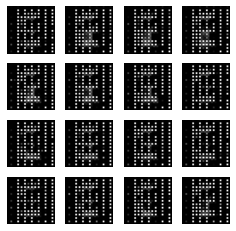

Epoch 1 .... Done
Epoch 2 .... Done
Epoch 3 .... Done
Epoch 4 .... Done
Epoch 5 .... Done
Epoch 6 .... Done
Epoch 7 .... Done
Epoch 8 .... Done
Epoch 9 .... Done
Epoch 10 .... Done


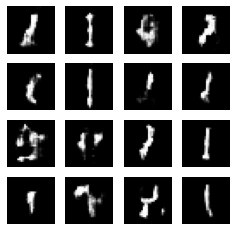

Epoch 11 .... Done
Epoch 12 .... Done
Epoch 13 .... Done
Epoch 14 .... Done
Epoch 15 .... Done
Epoch 16 .... Done
Epoch 17 .... Done
Epoch 18 .... Done
Epoch 19 .... Done
Epoch 20 .... Done


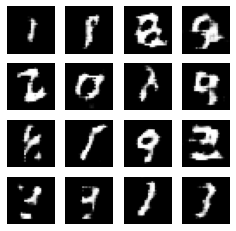

Epoch 21 .... Done
Epoch 22 .... Done
Epoch 23 .... Done
Epoch 24 .... Done
Epoch 25 .... Done
Epoch 26 .... Done
Epoch 27 .... Done
Epoch 28 .... Done
Epoch 29 .... Done
Epoch 30 .... Done


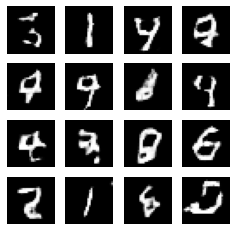

Epoch 31 .... Done
Epoch 32 .... Done
Epoch 33 .... Done
Epoch 34 .... Done
Epoch 35 .... Done
Epoch 36 .... Done
Epoch 37 .... Done
Epoch 38 .... Done
Epoch 39 .... Done
Epoch 40 .... Done


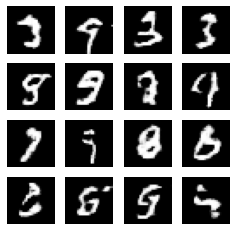

Epoch 41 .... Done
Epoch 42 .... Done
Epoch 43 .... Done
Epoch 45 .... Done
Epoch 46 .... Done
Epoch 47 .... Done
Epoch 48 .... Done
Epoch 49 .... Done
Epoch 50 .... Done


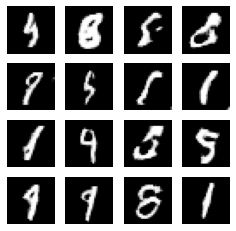

Epoch 51 .... Done
Epoch 52 .... Done
Epoch 53 .... Done
Epoch 54 .... Done
Epoch 55 .... Done
Epoch 56 .... Done
Epoch 57 .... Done
Epoch 58 .... Done
Epoch 59 .... Done
Epoch 60 .... Done


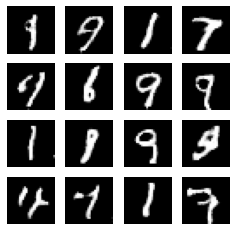

Epoch 61 .... Done
Epoch 62 .... Done
Epoch 63 .... Done
Epoch 64 .... Done
Epoch 65 .... Done
Epoch 66 .... Done
Epoch 67 .... Done
Epoch 68 .... Done
Epoch 69 .... Done
Epoch 70 .... Done


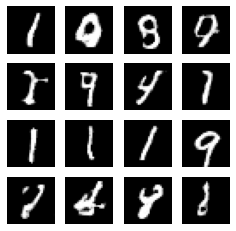

Epoch 71 .... Done
Epoch 72 .... Done
Epoch 73 .... Done
Epoch 74 .... Done
Epoch 75 .... Done
Epoch 76 .... Done
Epoch 77 .... Done
Epoch 78 .... Done
Epoch 79 .... Done
Epoch 80 .... Done


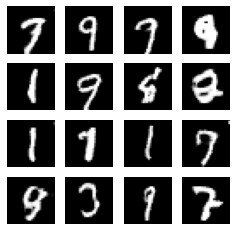

Epoch 81 .... Done
Epoch 82 .... Done
Epoch 83 .... Done
Epoch 84 .... Done
Epoch 85 .... Done
Epoch 86 .... Done
Epoch 87 .... Done
Epoch 88 .... Done
Epoch 89 .... Done
Epoch 90 .... Done


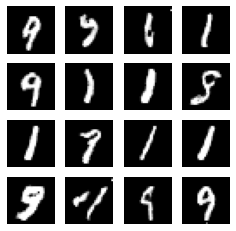

Epoch 91 .... Done
Epoch 92 .... Done
Epoch 93 .... Done
Epoch 94 .... Done
Epoch 95 .... Done
Epoch 96 .... Done
Epoch 97 .... Done
Epoch 98 .... Done
Epoch 99 .... Done
Epoch 100 .... Done


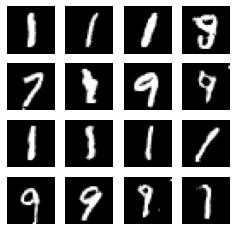

Epoch 101 .... Done
Epoch 102 .... Done
Epoch 103 .... Done
Epoch 104 .... Done
Epoch 105 .... Done
Epoch 106 .... Done
Epoch 107 .... Done
Epoch 108 .... Done
Epoch 109 .... Done
Epoch 110 .... Done


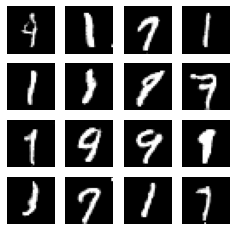

Epoch 111 .... Done
Epoch 112 .... Done
Epoch 113 .... Done
Epoch 114 .... Done
Epoch 115 .... Done
Epoch 116 .... Done
Epoch 117 .... Done
Epoch 118 .... Done
Epoch 119 .... Done
Epoch 120 .... Done


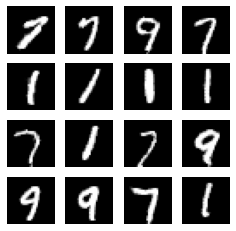

Epoch 121 .... Done
Epoch 122 .... Done
Epoch 123 .... Done
Epoch 124 .... Done
Epoch 125 .... Done
Epoch 126 .... Done
Epoch 127 .... Done
Epoch 128 .... Done
Epoch 129 .... Done
Epoch 130 .... Done


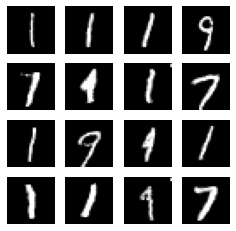

Epoch 131 .... Done
Epoch 132 .... Done
Epoch 133 .... Done
Epoch 134 .... Done
Epoch 135 .... Done
Epoch 136 .... Done
Epoch 137 .... Done
Epoch 138 .... Done
Epoch 139 .... Done
Epoch 140 .... Done


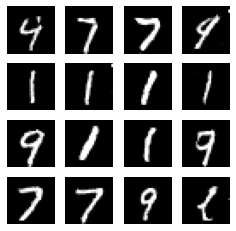

Epoch 141 .... Done
Epoch 142 .... Done
Epoch 143 .... Done
Epoch 144 .... Done
Epoch 145 .... Done
Epoch 146 .... Done
Epoch 147 .... Done
Epoch 148 .... Done
Epoch 149 .... Done
Epoch 150 .... Done


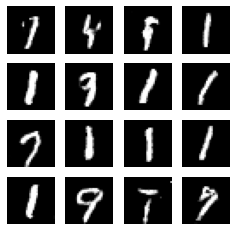

Epoch 151 .... Done
Epoch 152 .... Done
Epoch 153 .... Done
Epoch 154 .... Done
Epoch 155 .... Done
Epoch 156 .... Done
Epoch 157 .... Done
Epoch 158 .... Done
Epoch 159 .... Done
Epoch 160 .... Done


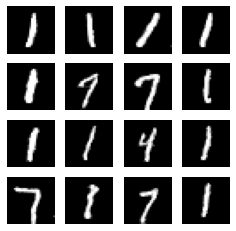

Epoch 161 .... Done
Epoch 162 .... Done
Epoch 163 .... Done
Epoch 164 .... Done
Epoch 165 .... Done
Epoch 166 .... Done
Epoch 167 .... Done
Epoch 168 .... Done
Epoch 169 .... Done
Epoch 170 .... Done


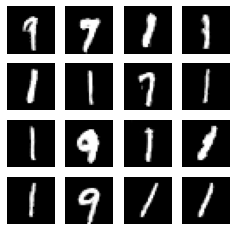

Epoch 171 .... Done
Epoch 172 .... Done
Epoch 173 .... Done
Epoch 174 .... Done
Epoch 175 .... Done
Epoch 176 .... Done
Epoch 177 .... Done
Epoch 178 .... Done
Epoch 179 .... Done
Epoch 180 .... Done


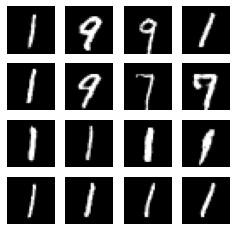

Epoch 181 .... Done
Epoch 182 .... Done
Epoch 183 .... Done
Epoch 184 .... Done
Epoch 185 .... Done
Epoch 186 .... Done
Epoch 187 .... Done
Epoch 188 .... Done
Epoch 189 .... Done
Epoch 190 .... Done


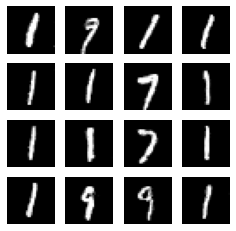

Epoch 191 .... Done
Epoch 192 .... Done
Epoch 193 .... Done
Epoch 194 .... Done
Epoch 195 .... Done
Epoch 196 .... Done
Epoch 197 .... Done
Epoch 198 .... Done
Epoch 199 .... Done


In [18]:
train()